In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [141]:
data=pd.read_csv('G:\DSA\Activity\StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# 1. Find out how many males and females participated in the test.

In [142]:
gdr_cnt=data.groupby('gender')[['gender']].count()
gdr_cnt.columns=['Count']
gdr_cnt

,Count
gender,
female,518
male,482


Out of total students participated in the test, 518 are female and 482 are male

# 2. What do you think about the students' parental level of education?

In [143]:
par_ed=data.groupby('parental level of education')[['math score','reading score','writing score']].mean()
par_ed.sort_values(by='writing score')

,math score,reading score,writing score
parental level of education,,,
high school,61.821429,64.602041,62.403061
some high school,63.134078,66.759777,64.888268
some college,67.128319,69.566372,69.035398
associate's degree,67.977477,71.018018,70.031532
bachelor's degree,69.288136,73.000000,73.381356
master's degree,70.254237,75.949153,75.677966


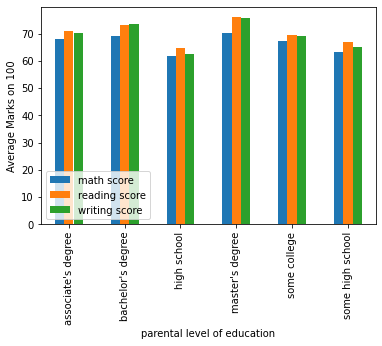

In [144]:
par_ed.plot(kind='bar',legend=0)
plt.legend(loc=3)
plt.ylabel('Average Marks on 100')
plt.show()

It is obsersved that the average marks for students in all the three subjects are lowest for children whose
parental education level is 'high school' level and highest for children whose parental education level is 'masters degree'
level. It's also interesting to note that the average marks of students goes up, in all three subjects as the level
of parental education is higher.

# 3a. Who scores the most on average for math, reading and writing based on Gender

In [145]:
gend_avg=data.groupby('gender')[['math score','reading score','writing score']].mean()
gend_avg
print('Average Math score is high for:',gend_avg[gend_avg['math score']==gend_avg['math score'].max()].index[0])
print('Average Reading score is high for:',gend_avg[gend_avg['reading score']==gend_avg['reading score'].max()].index[0])
print('Average Writing score is high for:',gend_avg[gend_avg['writing score']==gend_avg['writing score'].max()].index[0])

gend_avg

Average Math score is high for: male
Average Reading score is high for: female
Average Writing score is high for: female


,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


# 3b. Who scores the most on average for math, reading and writing based on Test preparation course

In [146]:
comp_avg=data.groupby('test preparation course')[['math score','reading score','writing score']].mean()

print('Average Math score is high for:',comp_avg[comp_avg['math score']==comp_avg['math score'].max()].index[0])
print('Average Reading score is high for:',comp_avg[comp_avg['reading score']==comp_avg['reading score'].max()].index[0])
print('Average Writng score is high for:',comp_avg[comp_avg['writing score']==comp_avg['writing score'].max()].index[0])

comp_avg

Average Math score is high for: completed
Average Reading score is high for: completed
Average Writng score is high for: completed


,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


# 4a.  Scoring variation for math, reading and writing based on Gender

In [182]:
gend_var=data.groupby('gender')[['math score','reading score','writing score']].var()
gend_var

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


The variance in scores for math, reading and writing based on gender are tabulated as above

# 4b.  Scoring variation for math, reading and writing based on Test preparation course

In [183]:
comp_var=data.groupby('test preparation course')[['math score','reading score','writing score']].var()
comp_var

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


The variance in scores for math, reading and writing based on Test preparation course are tabulated as above

# 5. Students eligible for bonus

In [197]:
data['rw_sum']=data['reading score']+data['writing score']
data['bonus']=0
bonus_data=data.sort_values(by=['math score','rw_sum'],ascending=False)
bonus_data.head(25)['bonus']=1
bonus_data.head(30)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,rw_sum,bonus
516,female,group E,bachelor's degree,standard,none,100,100,100,200,1
517,female,group E,associate's degree,standard,none,100,100,100,200,1
999,male,group E,bachelor's degree,standard,completed,100,100,100,200,1
997,male,group D,some college,standard,completed,100,97,99,196,1
998,male,group E,associate's degree,free/reduced,completed,100,100,93,193,1
515,female,group E,some college,standard,none,100,92,97,189,1
996,male,group A,some college,standard,completed,100,96,86,182,1
513,female,group E,bachelor's degree,standard,completed,99,100,100,200,1
514,female,group E,high school,standard,none,99,93,90,183,1
995,male,group E,some college,standard,completed,99,87,81,168,1


The modified dataframe gives students list sorted on the basis of math math scores. 
If more than one student holds the same position, they are further sorted on the basis of sum of scores in
reading and writing.
Futher , there are information about the bonus eligibility of students.
If the bonus field is equal to 1 , then the student is eligible for the bonus and if it is zero, they are not.